<a href="https://colab.research.google.com/github/dohyun1411/Quora-Insincere-Questions-Classification/blob/preprocessing1/very_simple_classifiers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Very simple classifiers
such as Naive Bayes, Decision Tree.

In [1]:
import numpy as np
import pandas as pd
from tqdm.auto import tqdm
tqdm.pandas()

/usr/local/lib/python3.7/dist-packages/tqdm/std.py:658: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  from pandas import Panel


Please verify your input path.

In [2]:
import os

# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))

In [3]:
# input_path = '/kaggle/input'
input_path = '/content/drive/MyDrive/ColabNotebooks/QIQC/data'
train_path = os.path.join(input_path, 'train.csv')
test_path = os.path.join(input_path, 'test.csv')
embeddings_path = os.path.join(input_path, 'embeddings.zip')

In [4]:
if os.path.exists(train_path): train_df = pd.read_csv(train_path)
else: train_df = pd.read_csv(train_path + '.zip')

if os.path.exists(test_path): test_df = pd.read_csv(train_path)
else: test_df = pd.read_csv(train_path + '.zip')

print('train shape:', train_df.shape)
print(train_df.head())
print()
print('test shape:', test_df.shape)
print(test_df.head())

train shape: (1306122, 3)
                    qid  ... target
0  00002165364db923c7e6  ...      0
1  000032939017120e6e44  ...      0
2  0000412ca6e4628ce2cf  ...      0
3  000042bf85aa498cd78e  ...      0
4  0000455dfa3e01eae3af  ...      0

[5 rows x 3 columns]

test shape: (1306122, 3)
                    qid  ... target
0  00002165364db923c7e6  ...      0
1  000032939017120e6e44  ...      0
2  0000412ca6e4628ce2cf  ...      0
3  000042bf85aa498cd78e  ...      0
4  0000455dfa3e01eae3af  ...      0

[5 rows x 3 columns]


In [5]:
# fill up the missing values
trainX = train_df["question_text"].fillna("_na_").values
testX = test_df["question_text"].fillna("_na_").values

trainY = train_df["target"].values

Use NLTK word_toknize.

In [6]:
import nltk
from nltk import word_tokenize
# nltk.download('punkt')

train_sents = []
for sent in tqdm(trainX): # 2min 34sec in Colab
    train_sents.append(word_tokenize(sent))

Features: (Please add more features)

1. len sent: length of the sentence
2. num words: number of words in the sentence
3. per capitals: percentage of capitalized words in the sentence
4. per no-alpha: percentage of non-alphabetic words in the sentence
5. per nouns: percentage of nouns in the sentence
6. polarity score: polarity score of the sentence
 

In [7]:
feature_df = pd.DataFrame()

In [8]:
len_sent = [len(sent) for sent in trainX]
feature_df['len sent'] = len_sent

num_words = [len(sent) for sent in train_sents]
feature_df['num words'] = num_words

per_capitals = [len([word for word in sent if word.isupper()]) / len(sent) for sent in train_sents]
feature_df['per capitals'] = per_capitals

per_no_alpha = [len([word for word in sent if not word.isalpha()]) / len(sent) for sent in train_sents]
feature_df['per no alpha'] = per_no_alpha

In [9]:
# nltk.download('averaged_perceptron_tagger')

per_nouns = []
for sent in tqdm(train_sents): # 12min 16sec in Colab
    noun_sent = []
    for word, pos in nltk.pos_tag(sent):
        if pos.startswith('N'):
            noun_sent.append(word)
    per_nouns.append(len(noun_sent) / len(sent))
feature_df['per nouns'] = per_nouns

In [10]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
# nltk.download('vader_lexicon')

sid = SentimentIntensityAnalyzer()
polarity_score = []
for sent in tqdm(trainX): # 3min 27sec in Colab
    polarity_score.append(sid.polarity_scores(sent)['compound'])
feature_df['polarity score'] = polarity_score

/usr/local/lib/python3.7/dist-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


In [11]:
feature_df['target'] = trainY
feature_df.head()

,len sent,num words,per capitals,per no alpha,per nouns,polarity score,target
0,72,14,0.000,0.142857,0.285714,0.0000,0
1,81,18,0.000,0.111111,0.111111,0.6124,0
2,67,12,0.000,0.166667,0.500000,0.0000,0
3,57,10,0.000,0.100000,0.500000,0.0000,0
4,77,16,0.125,0.062500,0.312500,0.0000,0


Visualize the features vs target.

Text(0.5, 1.0, 'len sent vs target')

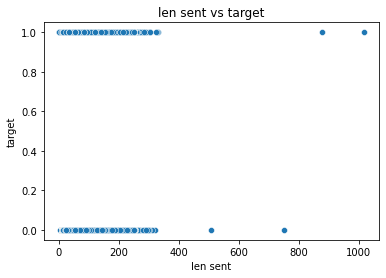

In [12]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

sns.scatterplot(x=feature_df['len sent'], y=feature_df['target'])
plt.title('len sent vs target')

Text(0.5, 1.0, 'num words vs target')

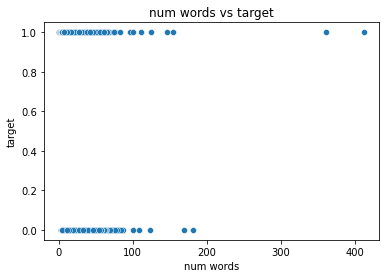

In [13]:
sns.scatterplot(x=feature_df['num words'], y=feature_df['target'])
plt.title('num words vs target')

Text(0.5, 1.0, 'per capitals vs target')

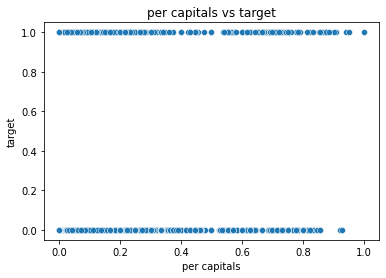

In [14]:
sns.scatterplot(x=feature_df['per capitals'], y=feature_df['target'])
plt.title('per capitals vs target')

Text(0.5, 1.0, 'per no alpha vs target')

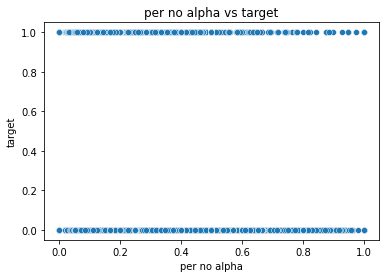

In [15]:
sns.scatterplot(x=feature_df['per no alpha'], y=feature_df['target'])
plt.title('per no alpha vs target')

Text(0.5, 1.0, 'per nouns vs target')

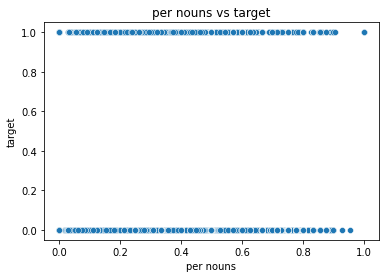

In [16]:
sns.scatterplot(x=feature_df['per nouns'], y=feature_df['target'])
plt.title('per nouns vs target')

Text(0.5, 1.0, 'polarity score vs target')

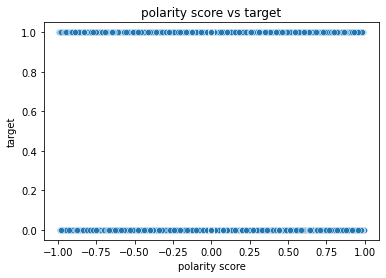

In [17]:
sns.scatterplot(x=feature_df['polarity score'], y=feature_df['target'])
plt.title('polarity score vs target')

Nothing interesting..

It seems like the result will be very poor. But we will do it as an experiment.

We will not handle the outliers because of the bias of the data. The outliers might be an important feature.

In [18]:
from sklearn.preprocessing import RobustScaler

def feature_scaling(df):

    target = df.pop('target') # We do not want to scale target.
    scaler = RobustScaler() # Use Robust Scaler for scaling.
    scaler.fit(df)
    df = pd.DataFrame(
        scaler.transform(df),
        columns=df.columns,
        index=list(df.index.values)
        )
    df['target'] = target # Merge the target value after scaling the feautres.

    return df

In [19]:
feature_df = feature_scaling(feature_df)
feature_df.head()

,len sent,num words,per capitals,per no alpha,per nouns,polarity score,target
0,0.300,0.25,0.000,0.404762,0.244898,0.00000,0
1,0.525,0.75,0.000,0.000000,-0.952381,1.69546,0
2,0.175,0.00,0.000,0.708333,1.714286,0.00000,0
3,-0.075,-0.25,0.000,-0.141667,1.714286,0.00000,0
4,0.425,0.50,2.125,-0.619792,0.428571,0.00000,0


We will use scikit-learn.

In [20]:
from sklearn.model_selection import train_test_split

train_df, val_df = train_test_split(feature_df, test_size=0.2)
trainY = train_df['target']
trainX = train_df.drop(['target'], axis=1)
valY = val_df['target']
valX = val_df.drop(['target'], axis=1)

In [21]:
from sklearn.metrics import f1_score
from sklearn.model_selection import GridSearchCV

###Naive Bayes

In [22]:
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()
nb.fit(trainX, trainY)
predY = nb.predict(valX)
f1_score(valY, predY)

0.21766989678356113

f1 score = 0.2176, very poor..

Let's select some informative features using forward selection.

In [89]:
from sklearn.tree import DecisionTreeClassifier

def get_score(classifier_name, cur_features, tuning=True, verbose=0):

    if classifier_name == 'nb':
        nb = GaussianNB()
        nb.fit(trainX[cur_features], trainY)
        predY = nb.predict(valX[cur_features])
        return f1_score(valY, predY)

    if classifier_name == 'dt':
        if tuning:
            grid_params = {
                'criterion': ['gini', 'entropy'],
                'min_samples_split': [2, 5, 10]
                }
            gs = GridSearchCV(DecisionTreeClassifier(), grid_params, verbose=verbose)
            gs.fit(trainX[cur_features], trainY)
            best_params = gs.best_params_
            classifier = DecisionTreeClassifier(**best_params)
        else:
            classifier = DecisionTreeClassifier()
    
    classifier.fit(trainX[cur_features], trainY)
    predY = classifier.predict(valX[cur_features])
    return f1_score(valY, predY)

In [90]:
from copy import deepcopy

def forward_selection(n_features, classifier_name, tuning=True, verbose=0):

    remaining_features = trainX.columns.tolist()
    selected_features = []
    best_score = 0.

    prev_features = []
    for i in tqdm(range(n_features)):
        cur_best_score = 0.
        cur_best_feature = ''

        for feature in remaining_features:
            cur_features = prev_features + [feature]

            score = get_score(classifier_name, cur_features, tuning=tuning, verbose=verbose)
            if score > cur_best_score:
                cur_best_score = score
                cur_best_feature = feature

        prev_features.append(cur_best_feature)
        remaining_features.remove(cur_best_feature)
        print("best score with", i + 1, "features:", cur_best_score)

        if cur_best_score > best_score:
            selected_features = deepcopy(prev_features)
            best_score = cur_best_score
    
    return selected_features, best_score

In [76]:
selected_features, best_score = forward_selection(6, 'nb')
print("selected features:", selected_features)
print("best f1 score:", best_score)

best score with 1 features: 0.1505155521328028
best score with 2 features: 0.18767635671632
best score with 3 features: 0.20521694545920657
best score with 4 features: 0.21621108580106302
best score with 5 features: 0.21696115308025413
best score with 6 features: 0.21766989678356113

selected features: ['len sent', 'num words', 'polarity score', 'per capitals', 'per no alpha', 'per nouns']
best f1 score: 0.21766989678356113


Nothing changed..

Let's try other classifiers.

###Decision Tree

In [79]:
selected_features, best_score = forward_selection(6, 'dt') # 19min 3sec in Colab
print("selected features:", selected_features)
print("best f1 score:", best_score)

best score with 1 features: 0.03317950814884047
best score with 2 features: 0.10073759725169242
best score with 3 features: 0.13790070797238468
best score with 4 features: 0.15383954646967876
best score with 5 features: 0.156965982477068
best score with 6 features: 0.1528557279630241

selected features: ['polarity score', 'per nouns', 'len sent', 'per capitals', 'per no alpha']
best f1 score: 0.156965982477068
CPU times: user 19min 5s, sys: 2.83 s, total: 19min 8s
Wall time: 19min 3s


Other classifiers such as k-NN and SVM are time consuming so we just skipped them.

###Conclusion

We cannot classify with simple classifiers.